# Bit-ereum Lending Exploratory Data Analysis (EDA)

### Case Study and Problem

Bit-ereum Lending is tearing it apart with our innovative blockchain based lending platform. We have experienced tremendous growth since we launched our one-of-a-kind lending product three years ago. 
 
We take our customers feedback seriously and our Head of Lending is asking you to analyze all the customer survey data since last September because we want to understand how we are stacking up against our competitors. 
  
Please analyze all the survey comments (Column G) and give us some insights on what our customers are saying about their interaction with us.


## Focus of EDA

##### Our service level

Are we responding to our customers on timely basis? People hate waiting…

##### Our agent’s performance

Are we making positive connection with our customers? Providing world-class service is our goal.

##### Our product

We need to know if we are putting up too many barriers for them to qualify for a loan with us. 


## Steps for Analysis and Solution:

#### 1) Read in Data and Evaluate Cleaning/Tidiness

#### 2) Data Cleaning

#### 3) Data Exploration

#### 4) Key Take-Aways


# 1) Read in Data and Evaluate Cleaning/Tidiness

### Summary:

Within the section, the dataset will be explored to validate data integrity. Those changes necessary to ensure data integrity will be noted for the next section which will directly address each issue. The importance here lies in the integrity of the analytical support provided to key stakeholders to drive positive value creation within strategic management initiatives. 

The data will be assessed both visually and programmatically. Furthermore, statistical distributions will be used to ensure that anomalies are detected and properly imputed or erased. This will ensure a lack of pull on variance accounting within the Eigenvalues during dimensional reduction. 

The steps for this sections are described generally below for clarity:

1) Read in dataset and import necessary packages

2) Visually Assess the Data

3) Programmatically Assess the Data

4) Note Necessary Changes for Cleaning Section

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
import string
import re
from collections import Counter

#Read Data
df = pd.read_csv('survey_comments_case_study.csv')

#Visual/Physical Assessment 
display(df.head())
display(df.info())
display(df.shape)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Period Survey Type  Ticket Id  T2B Response  B2B Response  \
0  11/26/2020    PS Email   19638968             0             1   
1  10/29/2020          MS   19550089             0             1   
2  10/15/2020    MS Email   19466960             0             1   
3   3/14/2021    MS Email   20187122             0             1   
4    3/5/2021          MS   20147880             0             0   

                        personal_loan_categorization  \
0  payment_solutions_collections_payments_claims_...   
1                member_support__other__transfer_out   
2                    member_support__other__feedback   
3  member_support__existing__general_inquiries__a...   
4      member_support_listed_to_do_list_bt_worksheet   

                                            Comments  
0                                                  0  
1                                                  0  
2  - making sure your website works...- making su...  
3                                                  ?  
4                                                  ?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53777 entries, 0 to 53776
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Period                        53777 non-null  object
 1   Survey Type                   53777 non-null  object
 2   Ticket Id                     53777 non-null  int64 
 3   T2B Response                  53777 non-null  int64 
 4   B2B Response                  53777 non-null  int64 
 5   personal_loan_categorization  40909 non-null  object
 6   Comments                      31497 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.9+ MB


None

(53777, 7)

In [2]:
#Visual Assessment
df.sample(6)

Period Survey Type  Ticket Id  T2B Response  B2B Response  \
31326  12/29/2020          MS   19828862             1             0   
42518   1/25/2021          PS         -1             1             0   
43387   1/17/2021          CD   19912303             1             0   
28161  10/24/2020          PS         -1             1             0   
9263   10/19/2020    MS Email   19462678             0             1   
11378    1/7/2021          MS   19866391             0             0   

                           personal_loan_categorization  \
31326     member_support_listed_to_do_list_lr_questions   
42518                                               NaN   
43387  customer_development___inbound__app_submit__sold   
28161                                               NaN   
9263    member_support_listed_app_no_todos_status_check   
11378               member_support_listed_to_do_list_pv   

                                                Comments  
31326  She was very personable and friendly during my...  
42518                                                NaN  
43387                                                NaN  
28161  She heard me out and fixed my dilemma very smo...  
9263   you could have answered my question. I have ap...  
11378                                                NaN

In [3]:
#Visual Assessment of Nulls

display(df[df['personal_loan_categorization'].isnull()].sample(6))
display(df[df['personal_loan_categorization'].isnull()].shape)

Period Survey Type  Ticket Id  T2B Response  B2B Response  \
9239     1/7/2021          PS         -1             0             1   
15644  11/18/2020          PS         -1             1             0   
17704  11/29/2020          PS         -1             1             0   
45239  12/24/2020          PS         -1             1             0   
33254   9/23/2020          PS         -1             1             0   
5666   11/20/2020          PS         -1             0             1   

      personal_loan_categorization  \
9239                           NaN   
15644                          NaN   
17704                          NaN   
45239                          NaN   
33254                          NaN   
5666                           NaN   

                                                Comments  
9239   You care only charge, you don?t cara pandemia ...  
15644                               Attention to details  
17704                           Extra nice and attentive  
45239                                                NaN  
33254  Took the time to review my issue & moving  for...  
5666                                    not been a bitch

(12868, 7)

In [4]:
#This shows how many of the missing loan categories are from positive and negative responses
plc_null = df[df['personal_loan_categorization'].isnull()]

plc_null['T2B Response'].value_counts()

1    10063
0     2805
Name: T2B Response, dtype: int64

In [5]:
#Exploring comments null
display(df[df['Comments'].isnull()].sample(6))
display(df[df['Comments'].isnull()].shape)

Period Survey Type  Ticket Id  T2B Response  B2B Response  \
47756  11/20/2020          CD   19653241             1             0   
11952  12/17/2020          MS   19772108             0             1   
14500   9/15/2020          MS   19347366             0             0   
37603   3/14/2021          CD   20241369             1             0   
37734   3/13/2021          MS   20197163             1             0   
53480    9/3/2020          MS   19304399             1             0   

                            personal_loan_categorization Comments  
47756   customer_development___inbound__app_submit__sold      NaN  
11952  member_support__existing__general_inquiries__w...      NaN  
14500  member_support_existing_general_inquiries_acco...      NaN  
37603   customer_development___inbound__app_submit__sold      NaN  
37734    member_support_listed_app_no_todos_status_check      NaN  
53480   member_support_existing_payments_refund/reversal      NaN

(22280, 7)

In [6]:
#This shows how many of the missing comments are from positive and negative responses
comments_null = df[df['Comments'].isnull()]
comments_null['T2B Response'].value_counts()

1    16894
0     5386
Name: T2B Response, dtype: int64

In [7]:
#This shows the lengths of comments by sentence length for oulier detection. Later, after the outliers are cleaned,
# then the individual words will be assessed for outliers.

#For a statistical distribution of comments lengths

dff = df[['Comments']]
dff.dropna(inplace=True)
dff["comment_length"]= dff["Comments"].str.len()
dff.comment_length.value_counts()

C:\Users\Owner\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Owner\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


7      1051
255    1031
26      603
25      599
12      595
       ... 
253       4
243       4
258       3
261       2
259       1
Name: comment_length, Length: 260, dtype: int64

In [8]:
#For a statistical distribution of comments lengths
dff = dff.sort_values('comment_length')

dff.comment_length.describe()

count    31497.000000
mean        59.587104
std         58.189328
min          1.000000
25%         22.000000
50%         39.000000
75%         73.000000
max        261.000000
Name: comment_length, dtype: float64

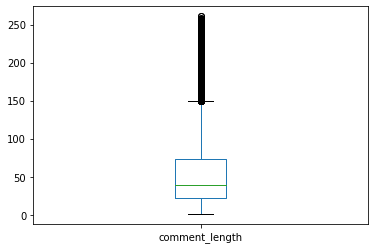

In [9]:
#For a statistical distribution of comments lengths
dff.comment_length.plot(kind='box')

In [10]:
#The bottom and top 3% of the comment_length distribution will be evaluated for nonsensical data

n = len(dff.comment_length)
outliers = n*(1/100) #may want some rounding logic if n is small
outliers

314.97

In [11]:
#Visually Assessing target areas for nonsensical data top and bottom as well as a random sample. There appears
#to be a lot of comments made which have no entry or nonsensical entries containing one letter or puncutation
#Lemmatization, stemming, and a removal of stop words will be used to combat this issue. 

display(dff.sample(6))
display(dff.head())
display(dff.tail())

Comments  comment_length
8207          Stop baby from screaming in the background              42
379    Anna should have asked me more questions and e...             148
7220                                           Responded               9
27697                          She assisted me very good              25
8428   The e-mail said the easiest way to get an answ...             255
17305                                          Excellent               9

Comments  comment_length
0            0               1
6917         R               1
23640        n               1
6865         Q               1
27241        s               1

Comments  comment_length
1503  Dear Sir/Madam,\r\nIt's not Calissa's work per...             258
8651  This has been a frustrating process.\r\nWhen I...             258
5714  Not disconnecting me, after several minutes on...             259
4431  It?s not about Ryan, because he is just a empl...             261
2593  he gave me a standard answer for a loan that h...             261

In [12]:
#This is inteded to show the each of the characters found within the reviews. Nonsensical characters will be dealt with.
i = dff.Comments
v=[]
def get_v(i):
    for word in i:
        for w in word:
            if w not in v:
                v.append(w)
    return v
vocabulary_dictionary = get_v(i)
display(np.ma.shape(vocabulary_dictionary))
display(vocabulary_dictionary)

(91,)

['0',
 'R',
 'n',
 'Q',
 's',
 'D',
 'K',
 'O',
 '?',
 '.',
 'B',
 'F',
 'N',
 '(',
 'k',
 'o',
 '1',
 'f',
 'r',
 'a',
 'M',
 'A',
 '/',
 ' ',
 't',
 'Y',
 'e',
 'l',
 'I',
 'd',
 'S',
 'm',
 'y',
 'G',
 'h',
 'j',
 'E',
 'u',
 'c',
 'i',
 'L',
 'C',
 'P',
 'g',
 'V',
 'T',
 'H',
 'p',
 '6',
 '5',
 '!',
 'q',
 'W',
 'w',
 ',',
 'v',
 'x',
 'b',
 '%',
 'U',
 "'",
 'J',
 'z',
 'X',
 '&',
 '-',
 '\r',
 '\n',
 '9',
 '3',
 'Z',
 '8',
 '=',
 ')',
 ':',
 '$',
 '+',
 '"',
 ';',
 '4',
 '2',
 '@',
 '#',
 '7',
 '_',
 '`',
 '*',
 '\\',
 '|',
 '[',
 ']']

### Notes for Cleaning, Wrangling, and Tidiness 

- Use Case Normalization
- Make Spelling Maps and Correct Spelling
- Remove stop words for character variance normalization
- /, r, n, and \ need to split words to columns and be dropped for tokenization
- Remove Punctuation
- Utilize Stemming to properly interpret word meaning numerically 
- There are random character entries which require removal. These and stop words need to be NaNs so as to impute with the above sections in turn so as to not disrupt the integrity of the character distributions

# 2) Data Cleaning

### Summary:

The purpose of this section is to correct issues found within the previous section. Those issues to be addressed are:
- Use Case Normalization
- Make Spelling Maps and Correct Spelling
- Remove stop words for character variance normalization
- /, r, n, and \ need to split words to columns and be dropped for tokenization
- Remove Punctuation
- Utilize Stemming to properly interpret word meaning numerically 
- There are random character entries which require removal. These and stop words need to be NaNs so as to impute with the above sections in turn so as to not disrupt the integrity of the character distributions


In [13]:
#Always make a copy of your dataset before each section which contains cleaning or transforming to preserve checkpoints.
dfc = df.copy()

In [14]:
#Case Normalization
dfc['Comments'] = dfc['Comments'].map(lambda x: x.lower() if isinstance(x,str) else x)
dfc.sample(6)

Period Survey Type  Ticket Id  T2B Response  B2B Response  \
37447   3/16/2021          CD   20232869             1             0   
8969    2/14/2021    MS Email   20032018             0             0   
22183   12/9/2020          PS         -1             1             0   
52389   9/16/2020          MS   19353453             1             0   
965     10/8/2020          PS         -1             0             1   
2719   10/19/2020          PS         -1             0             1   

                            personal_loan_categorization  \
37447   customer_development___inbound__app_submit__sold   
8969     member_support_listed_app_no_todos_status_check   
22183                                                NaN   
52389  member_support__existing__payments__stop_ach_p...   
965                                                  NaN   
2719                                                 NaN   

                                                Comments  
37447                                                NaN  
8969                            waiting to hear feedback  
22183                      informative and understanding  
52389                                                NaN  
965    be more understanding and personable regarding...  
2719   help me in time of need financially.....be of ...

In [15]:
#Remove stop words (words with no driving meaning e.g. to, this, is, etc.)
stop_words = set(stopwords.words("english"))
dfc['Comments'] = dfc['Comments'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop_words)]))

dfc.Comments.sample(6)

41469                        nan
9452                      crooks
11538                        nan
7298               response time
39628                        nan
22290    difficult hear clearly.
Name: Comments, dtype: object

In [16]:
#Characters /, r, n, and \ need to split words to columns and be dropped for tokenization
dfc["Comments"] = dfc["Comments"].apply(lambda x: x.replace("/", " "))
dfc["Comments"] = dfc["Comments"].apply(lambda x: x.replace(" r ",""))
dfc["Comments"] = dfc["Comments"].apply(lambda x: x.replace(" n ",""))
dfc['Comments'] = dfc.Comments.str.replace(r'\r\n', '')
dfc.replace({r'\r\n': ''}, regex=True)
dfc.Comments.str.strip(r'\r\n')

dfc

C:\Users\Owner\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


Period Survey Type  Ticket Id  T2B Response  B2B Response  \
0      11/26/2020    PS Email   19638968             0             1   
1      10/29/2020          MS   19550089             0             1   
2      10/15/2020    MS Email   19466960             0             1   
3       3/14/2021    MS Email   20187122             0             1   
4        3/5/2021          MS   20147880             0             0   
...           ...         ...        ...           ...           ...   
53772    9/1/2020          CD   19277037             1             0   
53773    9/1/2020          CD   19279495             1             0   
53774    9/1/2020          PS         -1             1             0   
53775    9/1/2020          CD   19277690             1             0   
53776    9/1/2020          MS   19278547             1             0   

                            personal_loan_categorization  \
0      payment_solutions_collections_payments_claims_...   
1                    member_support__other__transfer_out   
2                        member_support__other__feedback   
3      member_support__existing__general_inquiries__a...   
4          member_support_listed_to_do_list_bt_worksheet   
...                                                  ...   
53772   customer_development___inbound__app_submit__sold   
53773     customer_development___inbound__app_submit__aa   
53774                                                NaN   
53775                member_support__other__transfer_out   
53776                member_support__other__transfer_out   

                                                Comments  
0                                                      0  
1                                                      0  
2      - making sure website works...- making sure as...  
3                                                      ?  
4                                                      ?  
...                                                  ...  
53772                                                nan  
53773                                                nan  
53774                                                nan  
53775                                                nan  
53776                                                nan  

[53777 rows x 7 columns]

In [17]:
#Remove Websites
dfc['Comments'] = df['Comments'].replace(r'\S+', '', regex=True).replace(r'www\S+', '', regex=True)
dfc['Comments'] = df['Comments'].replace(r'\S+', '', regex=True).replace(r'https\S+', '', regex=True)
dfc['Comments'] = dfc['Comments'].astype('str')

#Remove Emails
dfc['Comments'] = df['Comments'].replace(r'\S*@\S*\s?', '', regex=True).replace(r'\S*@\S*\s?', '', regex=True)
dfc['Comments'] = dfc['Comments'].astype('str')

#Replace phone # with word 'number'

dfc['Comments'] = dfc['Comments'].str.replace('#',' number ')

#This next line will deal with issues of double spaces created by the replace above for instances of #1
dfc['Comments'] = dfc['Comments'].str.replace('  ',' ')
dfc['Comments'] = dfc['Comments'].str.lower()

#Remove punctuation
p = set(string.punctuation)
dfc['Comments'] = dfc['Comments'].apply(lambda x:''.join([i for i in x if i not in string.punctuation]))


#One Word Comment replacement with meanings
dfc['Comments'].sample(10)

11484                                                  nan
13717                                                  nan
32221                      takeing care of all my problems
24877                nothing she has good customer service
12976                                                  nan
28247    she helped me to understand the procedure when...
50501                                                  nan
21737    i eventually spoke with bethany who was an exc...
53458                                                  nan
4762     listen to what i was saying i told her that i ...
Name: Comments, dtype: object

In [18]:
result = Counter(" ".join(dfc['Comments'].values.tolist()).split(" ")).items()
result

dict_items([('0', 17), ('', 1719), ('making', 155), ('sure', 352), ('your', 1018), ('website', 139), ('works', 20), ('associates', 9), ('take', 266), ('care', 560), ('of', 3333), ('the', 8662), ('problem', 782), ('when', 845), ('its', 333), ('brought', 5), ('to', 11936), ('their', 115), ('attention', 114), ('that', 2501), ('doesnt', 47), ('work', 314), ('make', 444), ('phones', 5), ('are', 421), ('answered', 1641), ('properly', 33), ('in', 2333), ('other', 222), ('words', 14), ('from', 643), ('angle', 1), ('customer', 1648), ('s', 34), ('income', 102), ('not', 2924), ('verified', 31), ('is', 1548), ('a', 6064), ('lie', 14), ('i', 10541), ('have', 2322), ('pay', 492), ('stubs', 23), ('hard', 140), ('do', 780), ('wish', 60), ('he', 2330), ('just', 733), ('checked', 56), ('bank', 205), ('statement', 68), ('and', 15211), ('saw', 17), ('6', 24), ('yrs', 4), ('deposits', 4), ('number', 186), ('719', 1), ('5440871', 1), ('thank', 328), ('you', 2218), ('1', 62), ('ask', 213), ('for', 2598), ('

In [19]:
#Remove all newline and carriage characters from text in column
dfc['Comments'] = dfc['Comments'].fillna("").astype('str')
dfc.Comments.replace(r'\r','', regex=True, inplace=True)
dfc.Comments.replace(r'\n','', regex=True, inplace=True)

display(dfc[dfc['Comments'].str.contains(r'\n')])
display(dfc[dfc['Comments'].str.contains(r'\n')])

Empty DataFrame
Columns: [Period, Survey Type, Ticket Id, T2B Response, B2B Response, personal_loan_categorization, Comments]
Index: []

Empty DataFrame
Columns: [Period, Survey Type, Ticket Id, T2B Response, B2B Response, personal_loan_categorization, Comments]
Index: []

In [20]:
#Correcting Misspellings and nonsensicals
dfi = dfc.copy()

from autocorrect import Speller 
import pandas as pd 
spell = Speller()

dfi["Comments"] = [' '.join([spell(i) for i in x.split()]) for x in dfi['Comments']]

In [21]:
result = Counter(" ".join(dfi['Comments'].values.tolist()).split(" ")).items()
result

dict_items([('0', 17), ('making', 157), ('sure', 353), ('your', 1021), ('website', 139), ('works', 23), ('associates', 9), ('take', 266), ('care', 560), ('of', 3334), ('the', 8682), ('problem', 789), ('when', 847), ('its', 334), ('brought', 5), ('to', 11938), ('their', 115), ('attention', 119), ('that', 2516), ('doesnt', 48), ('work', 317), ('make', 446), ('phones', 5), ('are', 422), ('answered', 1647), ('properly', 33), ('in', 2334), ('other', 222), ('words', 14), ('from', 644), ('angle', 3), ('customer', 1663), ('s', 34), ('', 18), ('income', 102), ('not', 2933), ('verified', 31), ('is', 1548), ('a', 6064), ('lie', 14), ('i', 10559), ('have', 2328), ('pay', 500), ('stubs', 23), ('hard', 140), ('do', 780), ('wish', 61), ('he', 2334), ('just', 737), ('checked', 56), ('bank', 205), ('statement', 71), ('and', 15219), ('saw', 17), ('6', 24), ('yrs', 4), ('deposits', 4), ('number', 187), ('719', 1), ('5440871', 1), ('thank', 340), ('you', 2238), ('1', 62), ('ask', 215), ('for', 2600), ('to

In [22]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53777 entries, 0 to 53776
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Period                        53777 non-null  object
 1   Survey Type                   53777 non-null  object
 2   Ticket Id                     53777 non-null  int64 
 3   T2B Response                  53777 non-null  int64 
 4   B2B Response                  53777 non-null  int64 
 5   personal_loan_categorization  40909 non-null  object
 6   Comments                      53777 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.9+ MB


In [23]:
dfi.sample(20)

Period Survey Type  Ticket Id  T2B Response  B2B Response  \
21839  10/12/2020    MS Email   19448496             1             0   
23190   9/22/2020    PS Email   19335757             1             0   
53587    9/3/2020       Fraud         -1             1             0   
37157   3/19/2021          MS   20286554             1             0   
7870   11/12/2020          MS   19608091             0             0   
15216   1/11/2021          PS         -1             1             0   
38606    3/6/2021          MS   20173561             1             0   
50467  10/15/2020          PS         -1             1             0   
26628    2/2/2021          MS   19979366             1             0   
51399   9/27/2020          MS   19386069             1             0   
607     3/17/2021    MS Email   20240710             0             1   
41648    2/7/2021          PS         -1             1             0   
8531    1/17/2021    MS Email   19867946             0             1   
49902  10/22/2020          MS   19504531             1             0   
48640   11/6/2020    PS Email   19574695             1             0   
44057    1/9/2021          MS   19852585             1             0   
51747   9/23/2020          MS   19386848             1             0   
27218   9/20/2020          PS         -1             1             0   
37024   3/21/2021          CD   20267079             1             0   
22593    3/7/2021          MS   20187111             1             0   

                            personal_loan_categorization  \
21839    member_support_listed_app_no_todos_status_check   
23190  payment_solutions__other__not_able_to_authenti...   
53587                                                NaN   
37157                member_support__other__transfer_out   
7870   member_support_existing_general_inquiries_acco...   
15216                                                NaN   
38606     customer_development___inbound__app_submit__aa   
50467                                                NaN   
26628  member_support__existing__general_inquiries__2...   
51399  member_support_existing_general_inquiries_acco...   
607    member_support_existing_issued_issuance_turn_a...   
41648                                                NaN   
8531   member_support__pre-list__front_end_denial__aa...   
49902  member_support_existing_payments_one-time_paym...   
48640  member_support_existing_general_inquiries_acco...   
44057  member_support_existing_general_inquiries_acco...   
51747      member_support_listed_to_do_list_lr_questions   
27218                                                NaN   
37024     customer_development___inbound__app_submit__aa   
22593  member_support__existing__payments__hardship_p...   

                                                Comments  
21839  i initiated sevetalchats but did not receive a...  
23190  lending tree was clear consistent they have al...  
53587                                                nan  
37157                                                nan  
7870                                   she was just fine  
15216  angle was excellent because she was honest mor...  
38606                                                nan  
50467                                                nan  
26628                         quick answer no run around  
51399                                                nan  
607    answered my email instead of giving me generic...  
41648                                                nan  
8531   the response came across like you were mailing...  
49902                                                nan  
48640                                                nan  
44057                                                nan  
51747                                                nan  
27218                                  right information  
37024                                                nan  
22593  karen was a professionalism as well as concern...

In [21]:
#Checking Cleaning so far...
df_new = dfi.copy()
df_old = df.copy()

df_old['Comments_new'] = df_new['Comments']

df_old.sample(50)

Period   Survey Type  Ticket Id  T2B Response  B2B Response  \
28355  12/12/2020            CD   19760199             1             0   
39265    3/2/2021            PS         -1             1             0   
36806   2/17/2021            PS         -1             1             0   
34146   1/29/2021            PS         -1             1             0   
15988  12/23/2020            MS   19811479             1             0   
28749  11/27/2020            MS   19681772             1             0   
13534  10/20/2020            MS   19510211             0             1   
21538  10/30/2020            CD   19558135             1             0   
19680  10/31/2020            MS   19559486             1             0   
6022     3/3/2021            MS   20128171             0             1   
15177   2/25/2021      MS Email   20064164             1             0   
19158   9/11/2020            MS   19334265             1             0   
23198   1/14/2021            MS   19900227             1             0   
9269    9/26/2020            CD   19380934             0             1   
20719    3/9/2021            MS   20200729             1             0   
50380  10/15/2020            CD   19484766             1             0   
7896   10/12/2020            MS   19452148             0             1   
3045    1/12/2021      MS Email   19858748             0             1   
40133   2/23/2021      PS Email   20063324             1             0   
26871   10/9/2020  Social Media         -1             1             0   
13177  10/30/2020            MS   19559145             0             0   
40372   2/20/2021            MS   20075720             1             0   
10425   2/14/2021      MS Email   20002265             0             1   
38887    3/4/2021            MS   20151503             1             0   
28726   3/18/2021            MS   20261977             1             0   
37049   3/20/2021            MS   20287575             1             0   
47032   12/2/2020            PS         -1             1             0   
8657    3/15/2021            MS   20233559             0             1   
27362    2/2/2021            MS   19963599             1             0   
21293  10/28/2020            MS   19519462             1             0   
993      1/8/2021      PS Email   19864555             0             0   
27885   11/3/2020            MS   19554836             1             0   
5455   11/25/2020            PS         -1             0             1   
30084  10/27/2020            PS         -1             1             0   
9378    2/26/2021      PS Email   20102271             0             1   
53482    9/3/2020            MS   19307204             1             0   
22906  10/19/2020            PS         -1             1             0   
3533   12/25/2020      MS Email   19804340             0             0   
17139   9/29/2020       MS Chat   19389508             1             0   
42313   1/27/2021            MS   19939521             1             0   
25141  10/18/2020            MS   19499441             1             0   
7728   11/20/2020            MS   19649751             0             1   
21777   9/26/2020      MS Email   19364281             1             0   
13985   9/30/2020       MS Chat   19334001             0             1   
39568   2/28/2021            MS   20132273             1             0   
47546  11/23/2020      PS Email   19636273             1             0   
3486   11/24/2020      MS Email   19644131             0             1   
6887    11/1/2020      MS Email   19565540             0             1   
47518  11/24/2020            PS         -1             1             0   
10123   2/25/2021            CD   20107682             0             1   

                            personal_loan_categorization  \
28355  member_support_existing_general_inquiries_acco...   
39265                                                NaN   
36806                                                NaN

In [25]:
#Drop unusable NaNs

display(df_old[df_old['Comments'].isnull()].shape)
display(df_old[df_old['Comments'].isnull()].sample(50))

(22280, 8)

Period Survey Type  Ticket Id  T2B Response  B2B Response  \
13535  10/20/2020          CD   19487761             0             1   
46919   12/8/2020     MS Auto   19731666             1             0   
47283  11/27/2020          CD   19684666             1             0   
44864  12/29/2020          MS   19828468             1             0   
11491    1/3/2021          MS   19828928             0             0   
14681    9/8/2020          MS   19297787             0             1   
52918   9/11/2020          PS         -1             1             0   
49077   11/1/2020    MS Email   19565741             1             0   
41913    2/2/2021          MS   19977336             1             0   
42295   1/27/2021          MS   19935226             1             0   
38111   3/10/2021          CD   20208745             1             0   
37518   3/15/2021          CD   20245506             1             0   
38388    3/9/2021          CD   20194379             1             0   
50788  10/11/2020          MS   19474241             1             0   
47550  11/23/2020          MS   19644233             1             0   
46120  12/16/2020    MS Email   19772310             1             0   
46801   12/9/2020          MS   19728851             1             0   
53207    9/9/2020       Fraud         -1             1             0   
44466    1/5/2021          MS   19853120             1             0   
47686  11/22/2020          MS   19656804             1             0   
43689   1/13/2021          MS   19887584             1             0   
50823  10/11/2020          MS   19474840             1             0   
9741    3/10/2021          CD   20192706             0             1   
13558  10/19/2020          MS   19506503             0             0   
53420    9/4/2020          MS   19307692             1             0   
49837  10/23/2020    MS Email   19509333             1             0   
39981   2/24/2021          MS   20079326             1             0   
37624   3/14/2021          MS   20207422             1             0   
46497  12/12/2020          MS   19731051             1             0   
13028   11/5/2020          PS         -1             0             0   
38050   3/11/2021          MS   20222965             1             0   
40852   2/16/2021          MS   20042197             1             0   
49990  10/21/2020          MS   19513084             1             0   
46030  12/16/2020          PS         -1             1             0   
14757    9/4/2020          PS         -1             0             0   
49485  10/27/2020          MS   19522018             1             0   
9698    3/11/2021          MS   20214904             0             1   
43210   1/19/2021          MS   19905017             1             0   
12802  11/15/2020    PS Email   19623665             0             1   
48658   11/6/2020          MS   19585033             1             0   
47178  11/29/2020          MS   19686679             1             0   
43487   1/16/2021          MS   19909124             1             0   
9691    3/11/2021          PS         -1             0             0   
45643  12/20/2020          CD   19800101             1             0   
50081  10/20/2020          MS   19510930             1             0   
52926   9/11/2020          CD   19339697             1             0   
13459  10/22/2020          MS   19505346             0             1   
38344    3/9/2021     MS Chat   20170420             1             0   
10617    2/2/2021          PS         -1             0             1   
11187   1/13/2021          PS         -1             0             1   

                            personal_loan_categorization Comments Comments_new  
13535     customer_development___inbound__app_submit__aa      NaN          nan  
46919                                                NaN      NaN          nan  
47283  customer_development___inbound__app_submit__no...      NaN          nan  
44864  member_

In [26]:
#Sparsity ratios for eigenvalue effect when deleting nulls needs to be explored. First entries with one word need to be 
#dropped or kept

df_new = df_new[df_new.Comments != 'nan']
df_new = df_new[df_new.Comments != 'nothing']
df_new = df_new[df_new.Comments != 'none']
df_new = df_new[df_new.Comments.str.len() >=4]


word = df_new[df_new.Comments.str.count(' ') == 0]
display(word.Comments.value_counts())

excellent        172
professional      75
everything        75
friendly          60
knowledgeable     52
                ... 
successful         1
direct             1
skilled            1
direction          1
business           1
Name: Comments, Length: 216, dtype: int64

In [27]:
#Calculated Total Sparsity 
total = df_new.shape[0]*df_new.shape[1]
missing = df_new.isnull().sum().sum() 
percent = (missing/float(total))*100
display("Total % Sparsity in Dataframe")
display(percent)

'Total % Sparsity in Dataframe'

3.8206418301392575

In [28]:
df_new['Comments'] = df_new['Comments'].str.replace('\d+', '')

df_new = df_new.fillna('unknown')
df_new['personal_loan_categorization'] = df_new.personal_loan_categorization.str.replace(r'(^.*member_support.*$)', 'member support')
df_new['personal_loan_categorization'] = df_new.personal_loan_categorization.str.replace(r'(^.*customer_devel.*$)', 'customer development')
df_new['personal_loan_categorization'] = df_new.personal_loan_categorization.str.replace(r'(^.*payment.*$)', 'payment solutions')
df_new['personal_loan_categorization'] = df_new.personal_loan_categorization.str.replace(r'(^.*fraud.*$)', 'fraud')
df_new['personal_loan_categorization'] = df_new.personal_loan_categorization.str.replace(r'(^.*consumer.*$)', 'customer development')
df_new['Comments'] = df_new.Comments.str.replace(r'(^.*was.*$)', '')
df_new['personal_loan_categorization'] = df_new['personal_loan_categorization'].str.replace('_make', 'unknown')

df_new.personal_loan_categorization.value_counts()

C:\Users\Owner\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
C:\Users\Owner\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
C:\Users\Owner\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
C:\Users\Owner\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
C:\Users\Owner\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys
C:\Users\Owner\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarn

member support          17964
unknown                  8114
payment solutions        2153
customer development     2089
fraud                       4
Name: personal_loan_categorization, dtype: int64

In [29]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30324 entries, 2 to 36925
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Period                        30324 non-null  object
 1   Survey Type                   30324 non-null  object
 2   Ticket Id                     30324 non-null  int64 
 3   T2B Response                  30324 non-null  int64 
 4   B2B Response                  30324 non-null  int64 
 5   personal_loan_categorization  30324 non-null  object
 6   Comments                      30324 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.9+ MB


In [30]:
df_final = df_new.copy()
df_final = df_final[df_final['Comments']!='']

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20827 entries, 2 to 36925
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Period                        20827 non-null  object
 1   Survey Type                   20827 non-null  object
 2   Ticket Id                     20827 non-null  int64 
 3   T2B Response                  20827 non-null  int64 
 4   B2B Response                  20827 non-null  int64 
 5   personal_loan_categorization  20827 non-null  object
 6   Comments                      20827 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.3+ MB


# 3) Data Exploration

### Summary:

Within this section the text was explored and visualized to gain insight into the customer reviews.

The process will be similar for total, top response, and bottom response reviews. Each review will be disected by looking at distributions for comment character length, word count, and word lengths. Next words will be visualized by their occurence and then by their occurence in groups of 2 throughout reviews. Finally, a wordcloud visualization will be generated to show those words which occured most throughout the data.

This process will be repeated for the entire dataset, then for the top responses and bottom responses. This will allow for a complete understanding of customer sentiment from both satisfied and dissatisfied customers.

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.]),
 <a list of 8 Text yticklabel objects>)

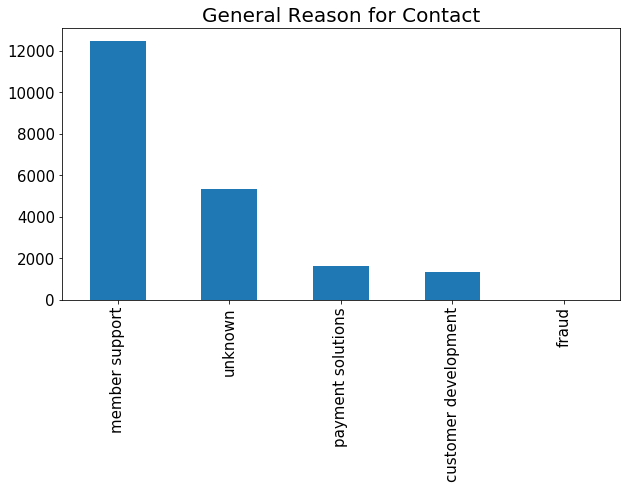

In [31]:
df_final.personal_loan_categorization.value_counts().plot(kind='bar', figsize=(10,5))
plt.title('General Reason for Contact', size=20)
plt.xticks(size = 15)
plt.yticks(size = 15)

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000.]),
 <a list of 6 Text yticklabel objects>)

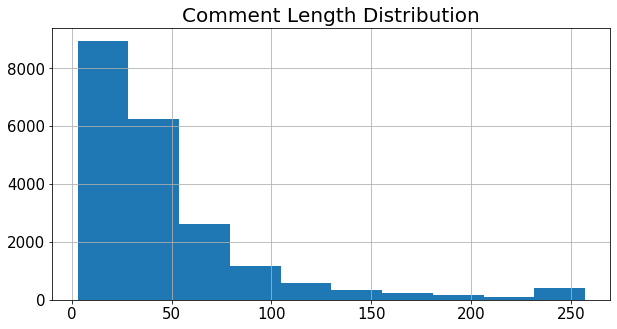

In [32]:
df_final['Comments'].str.len().hist(figsize=(10,5), bins=10)


plt.title('Comment Length Distribution', size=20)
plt.xticks(size = 15)
plt.yticks(size = 15)

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.]),
 <a list of 8 Text yticklabel objects>)

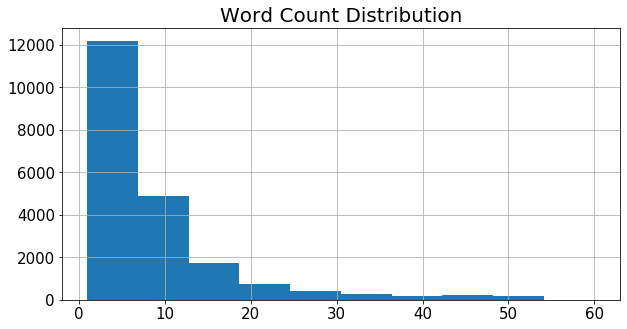

In [33]:
def plot_word_hist(text):
    text.str.split().map(lambda x: len(x)).hist(figsize = (10,5), bins=10)
    
    
plot_word_hist(df_final['Comments'])
plt.title('Word Count Distribution', size=20)
plt.xticks(size = 15)
plt.yticks(size = 15)

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 <a list of 7 Text yticklabel objects>)

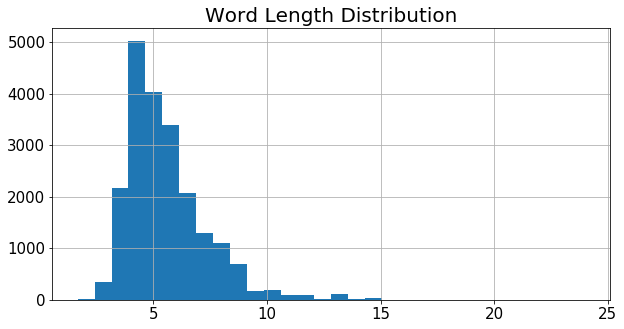

In [34]:
def plot_word_len_hist(text):
    text.str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist(figsize=(10,5),bins = 30)
    
    
plot_word_len_hist(df_final['Comments'])
plt.title('Word Length Distribution', size=20)
plt.xticks(size = 15)
plt.yticks(size = 15)

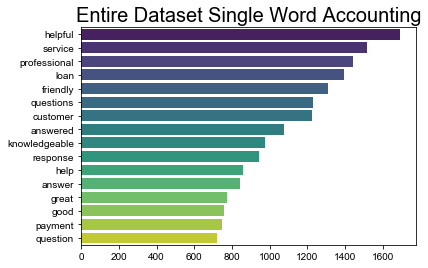

In [35]:
import seaborn as sns

def top_words(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x, palette = 'viridis')
    plt.title('Entire Dataset Single Word Accounting', size=20)
    sns.set(rc={'figure.figsize':(20,10)})

    
    
top_words(df_final['Comments'])

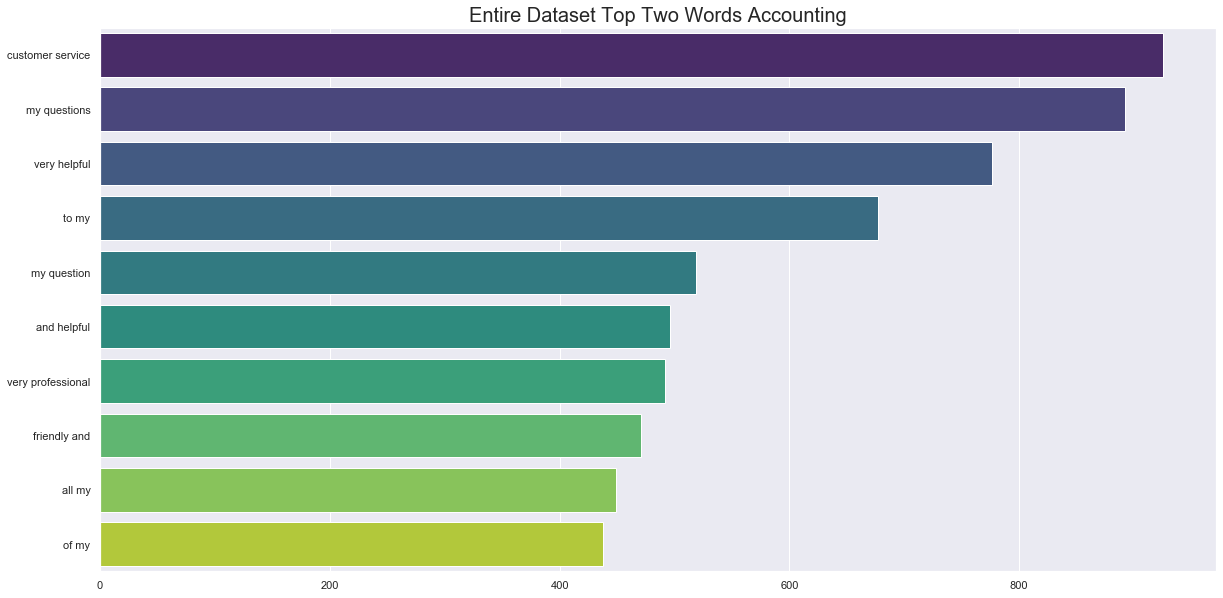

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x, palette = 'viridis')
    plt.title('Entire Dataset Top Two Words Accounting', size=20)
    sns.set(rc={'figure.figsize':(20,10)})
    
    
plot_top_ngrams_barchart(df_final['Comments'],2)

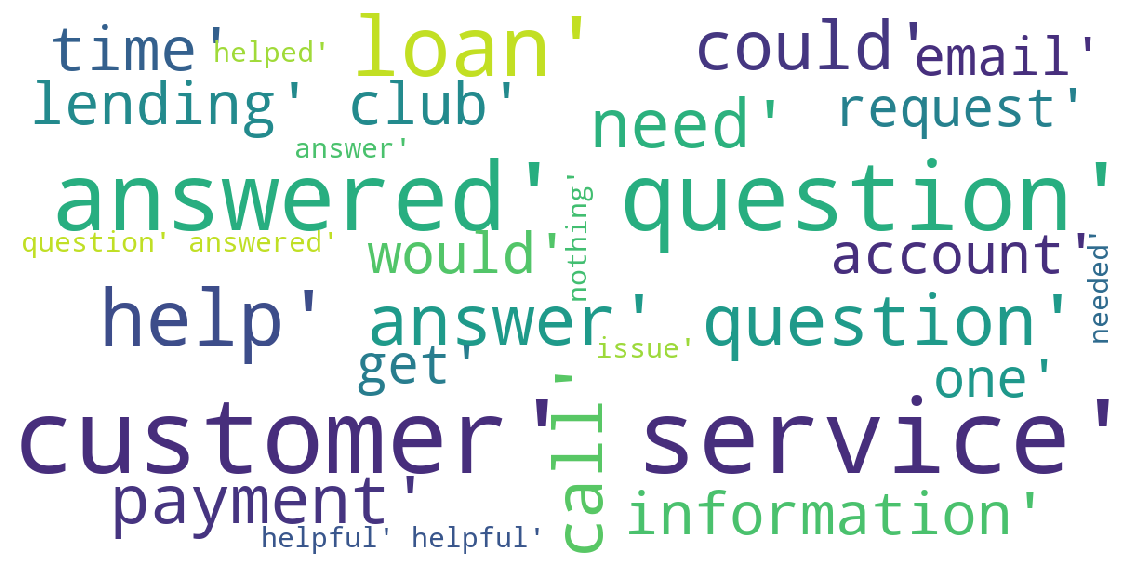

In [37]:
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)




def plot_wordcloud(text):
    nltk.download('stopwords',quiet=True)
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=25,
        max_font_size=50, 
        scale=3,
        random_state=3)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(20, 20))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.style.use('seaborn-dark-palette')
    plt.show();
    

    
plot_wordcloud(df_final['Comments'])

# Split dataset by T2B and B2B for positive negative sentiment exploration

In [38]:
copy = df_final.copy()

t2b = copy[copy['T2B Response']==1]
b2b = copy[copy['B2B Response']==1]

# Top Responses

### Responses were divided by the variable T2B and B2B in order to explore positive and negative customer reviews.

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.]),
 <a list of 9 Text yticklabel objects>)

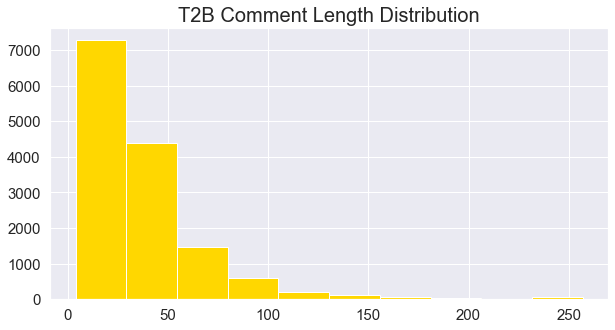

In [39]:
t2b['Comments'].str.len().hist(figsize=(10,5), bins=10, color = 'gold')


plt.title('T2B Comment Length Distribution', size=20)
plt.xticks(size = 15)
plt.yticks(size = 15)

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 <a list of 7 Text yticklabel objects>)

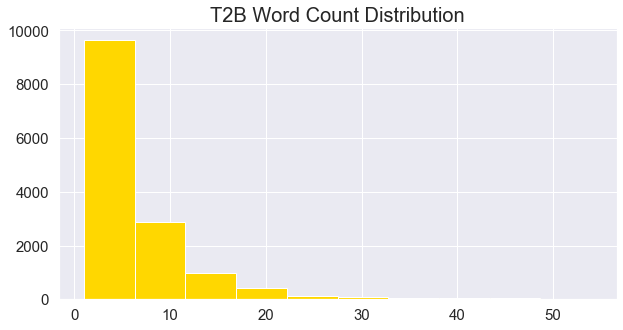

In [40]:
def plot_word_hist(text):
    text.str.split().map(lambda x: len(x)).hist(figsize = (10,5), bins=10, color = 'gold')
    
    
plot_word_hist(t2b['Comments'])
plt.title('T2B Word Count Distribution', size=20)
plt.xticks(size = 15)
plt.yticks(size = 15)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 7 Text yticklabel objects>)

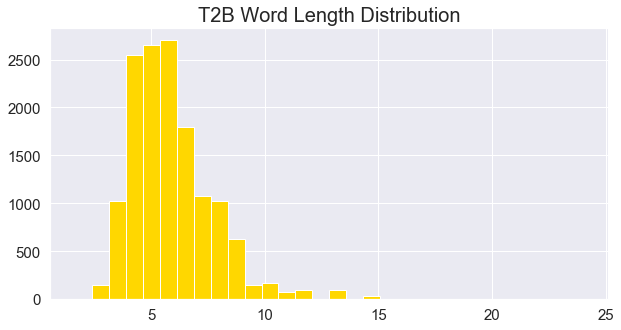

In [41]:
def plot_word_len_hist(text):
    text.str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist(figsize=(10,5),bins = 30, color = 'gold')
    
    
plot_word_len_hist(t2b['Comments'])
plt.title('T2B Word Length Distribution', size=20)
plt.xticks(size = 15)
plt.yticks(size = 15)

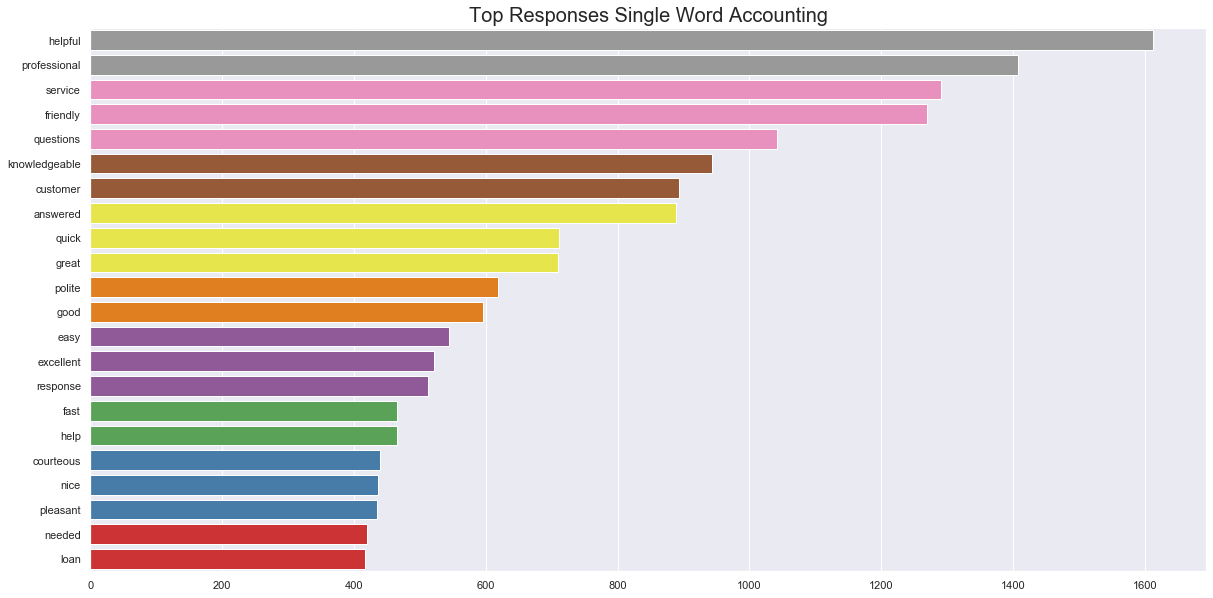

In [42]:
import seaborn as sns

def top_words(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x, palette = 'Set1_r')
    plt.title('Top Responses Single Word Accounting', size=20)
    sns.set(rc={'figure.figsize':(20,10)})

    
    
top_words(t2b['Comments'])

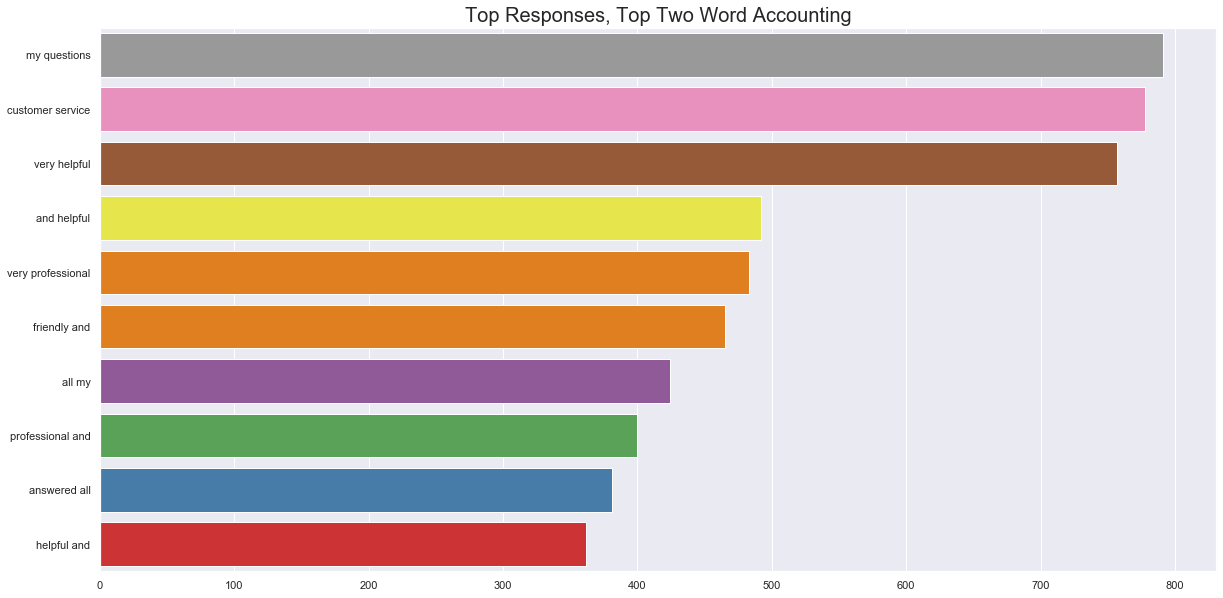

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x, palette = 'Set1_r')
    plt.title('Top Responses, Top Two Word Accounting', size=20)
    sns.set(rc={'figure.figsize':(20,10)})
    
    
    
    
    
plot_top_ngrams_barchart(t2b['Comments'],2)

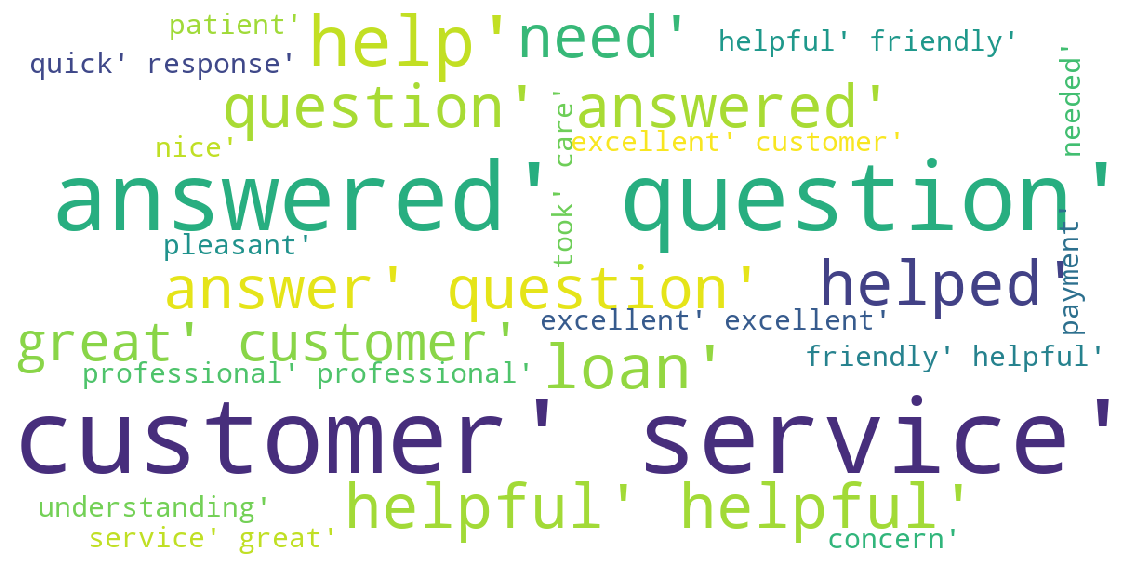

In [44]:
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)

def plot_wordcloud(text):
    nltk.download('stopwords', quiet=True)
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=25,
        max_font_size=50, 
        scale=3,
        random_state=3)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(20, 20))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.style.use('seaborn-dark-palette')
    plt.show();

    
plot_wordcloud(t2b['Comments'])

# Bottom Responses 

### Responses were divided by the variable T2B and B2B in order to explore positive and negative customer reviews.

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800., 900.]),
 <a list of 10 Text yticklabel objects>)

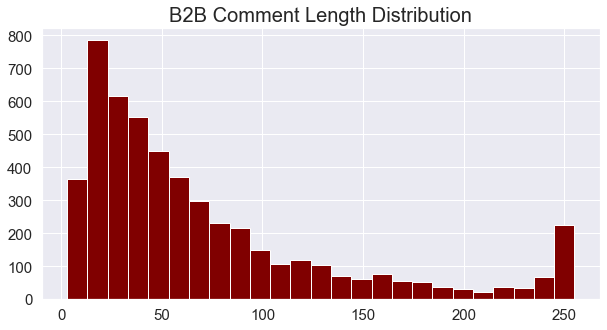

In [45]:
b2b['Comments'].str.len().hist(figsize=(10,5), bins=25, color ='maroon')


plt.title('B2B Comment Length Distribution', size=20)
plt.xticks(size = 15)
plt.yticks(size = 15)

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 7 Text yticklabel objects>)

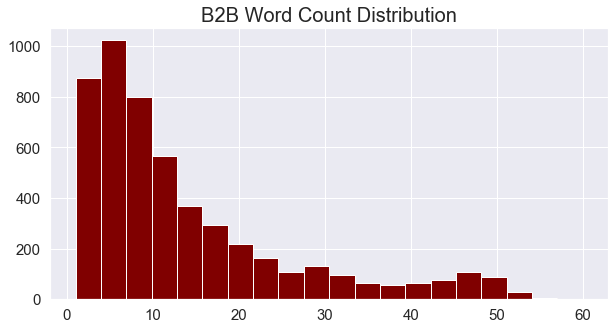

In [46]:
def plot_word_hist(text):
    text.str.split().map(lambda x: len(x)).hist(figsize = (10,5), bins=20, color ='maroon')
    
    
plot_word_hist(b2b['Comments'])
plt.title('B2B Word Count Distribution', size=20)
plt.xticks(size = 15)
plt.yticks(size = 15)

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
        1800.]),
 <a list of 10 Text yticklabel objects>)

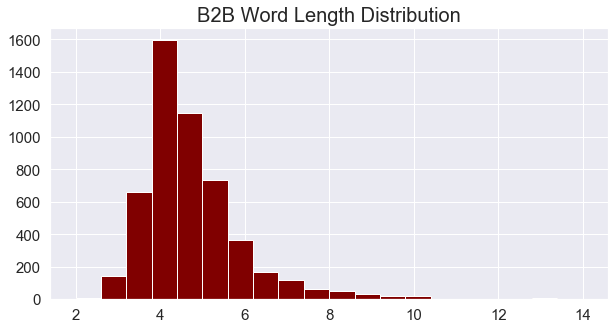

In [47]:
def plot_word_len_hist(text):
    text.str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist(figsize=(10,5),bins = 20, color ='maroon')
    
    
plot_word_len_hist(b2b['Comments'])
plt.title('B2B Word Length Distribution', size=20)
plt.xticks(size = 15)
plt.yticks(size = 15)

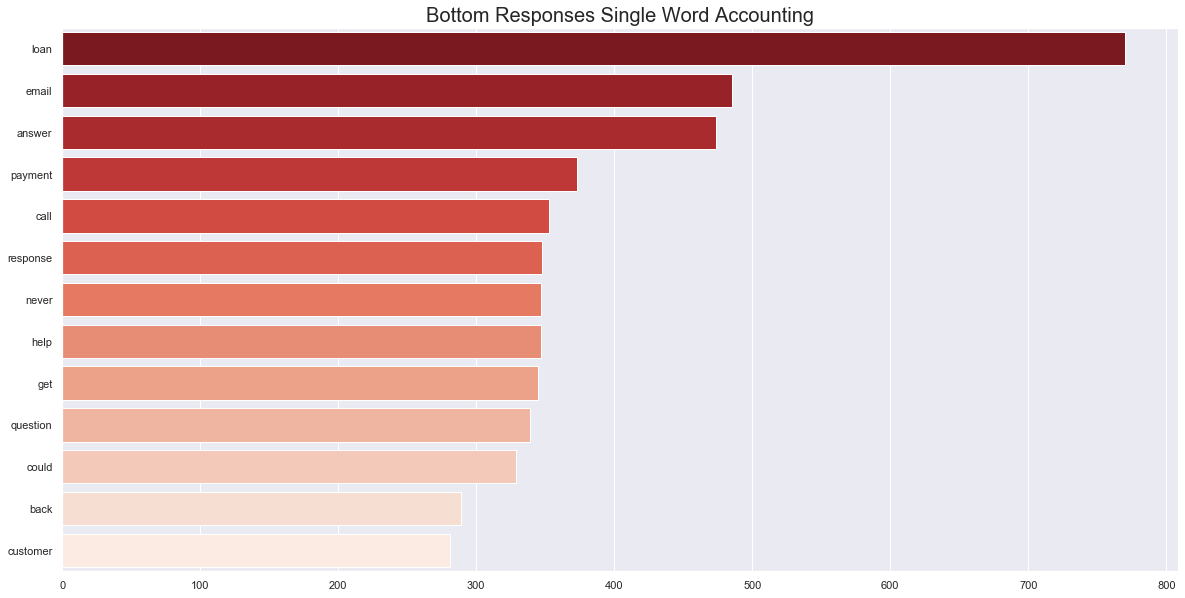

In [48]:
import seaborn as sns

def top_words(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x, palette = 'Reds_r')
    plt.title('Bottom Responses Single Word Accounting', size=20)
    sns.set(rc={'figure.figsize':(20,10)})

    
    
top_words(b2b['Comments'])

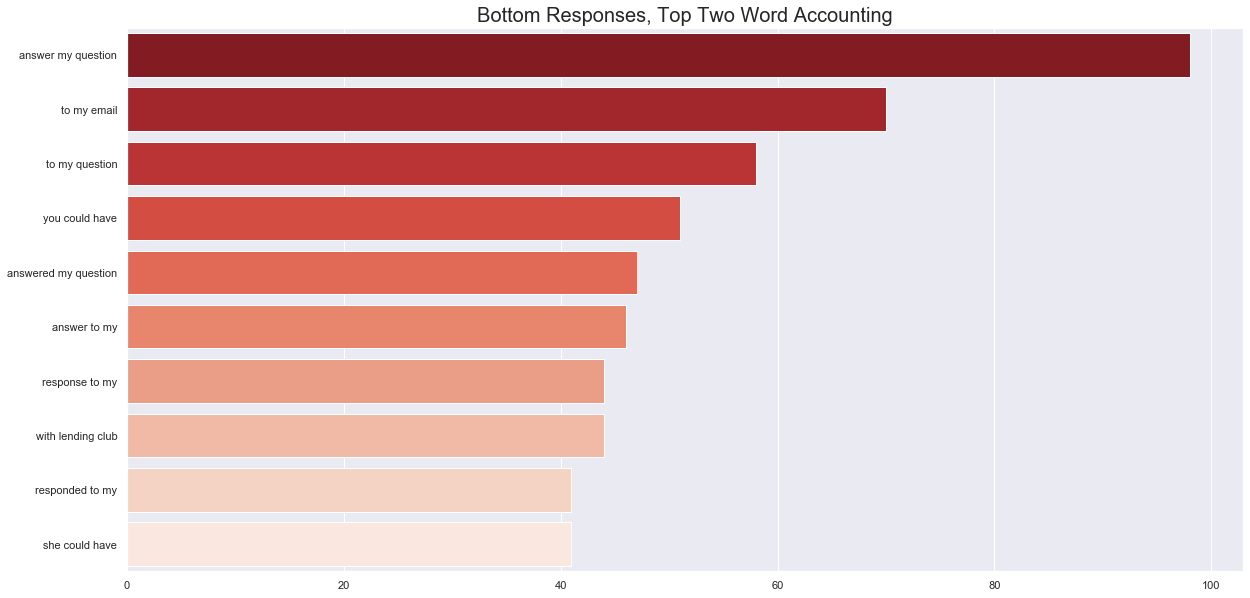

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x, palette = 'Reds_r')
    plt.title('Bottom Responses, Top Two Word Accounting', size=20)
    sns.set(rc={'figure.figsize':(20,10)})
    
    
    
    
plot_top_ngrams_barchart(b2b['Comments'],3)

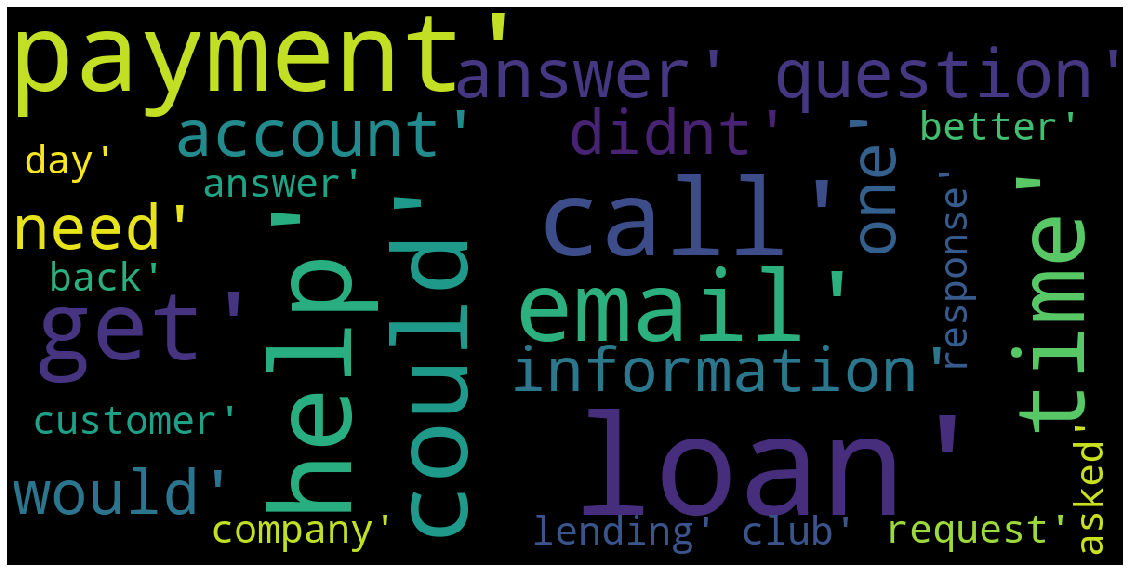

In [50]:
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)

def plot_wordcloud(text):
    nltk.download('stopwords', quiet=True)
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='black',
        stopwords=set(STOPWORDS),
        max_words=25,
        max_font_size=50, 
        scale=3,
        random_state=3)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(20, 20))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.style.use('seaborn-dark-palette')
    plt.show();

    
plot_wordcloud(b2b['Comments'])

# 4) Key Take-Aways

### The purpose of this Exploratory Data Analysis is once again:

To build an analysis based on our core focus areas:
- Our service level – Are we responding to our customers on timely basis? People hate waiting…
- Our agent’s performance – Are we making positive connection with our customers? Providing world-class service is our goal
- Our product – We need to know if we are putting up too many barriers for them to qualify for a loan with us. 

###### Breakdown of the T2B responses. 
- What are we doing right? 
- Why do our customers like us? 

##### Breakdown of the B2B responses
- What are we doing wrong? 
- How can we improve?    




# Breakdown of T2B Responses

### What are we doing right?

##### Accomplished 'Core Focus' Areas:
- Our Agent's Performance
    Specific Examples from Reviews:
        - About 1600 mentions of the word helpful
        - Similar mentions of the words: service, friendly, professional, and my questions
- Our Product
    Specific Examples from Reviews:
        - Around 400 mentions among top reviews of the word loan

### Why do customers like us?

Simply put, customers like us for our professional service and product. We should look to use this identity relationship that has formed with our customers for strategic marketing initiatives. This will lead to a sustainable brand image of customer/product centric.

# Breakdown of B2B Responses

### What are we doing wrong?

##### Neglected 'Core Focus' Areas:
- Our Service Level
    Specific Examples from Reviews:
        - From the grouped occurrences, it is apparent our customers are telling us that response time using email, phone, 
          and any other method, is too slow. 
        
- Our Product
    Specific Examples from Reviews:
        - Excessive mentions of the word loan cause concern. However, the axiom of the use of this term is ambigious,
          meaning the term may be used as a subject verses an identifier e.g. "The service was slow to respond on my 
          loan".


### How can we Improve?

We need to investigate further into the subject of loan quality. Currently, it stands to be proven that our product is lacking. It does stand evident that our processes and ticket turn around times are too long for customers' liking. We need to dive into operations and gather ticket times for customer out-reach. The following steps would be to benchmark with competitors and refer to HR for employee trainings, or a logistics consultant for process improvement.

# End of Presentation 

In [22]:
ddff = df_new

In [23]:
import base64
from IPython.display import HTML

ddff.to_csv('fully_prepared_data.csv', sep=',')
def create_download_link( ddff, title = "Download CSV file", filename = "fully_prepared_data.csv"):
    csv = ddff.to_csv(index = False)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(ddff)